Two Rotating Gears (Two classes. Bidimensional).
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  3.466397678
Average MCC:  0.903621907787807
Average error: 5.181800000000024
Average macro-F1: 0.9514823936247346
Average micro-F1: 0.9520000000000001
Average Accuracy:  94.81819999999998
Standard Deviation:  3.5177095900599866
Variance:  12.37428076


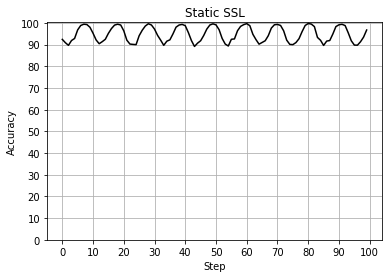

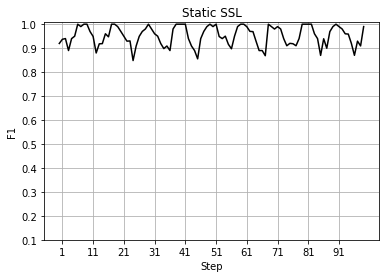

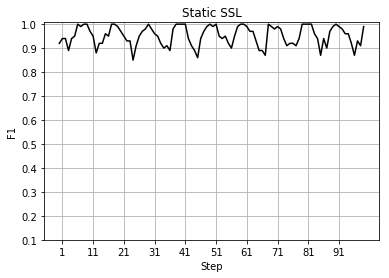




METHOD: Sliding lp as classifier
Execution time:  3.0563822149999993
Average MCC:  0.9522228621791363
Average error: 2.7309999999999803
Average macro-F1: 0.9755793070764178
Average micro-F1: 0.9758000000000001
Average Accuracy:  97.26900000000002
Standard Deviation:  1.327197423143971
Variance:  1.7614529999999966


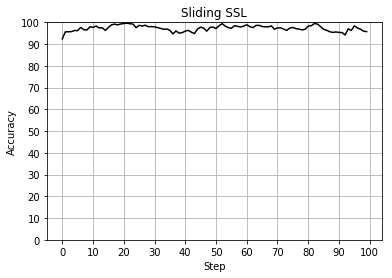

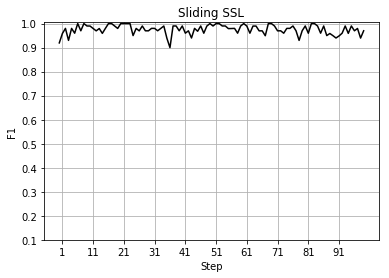

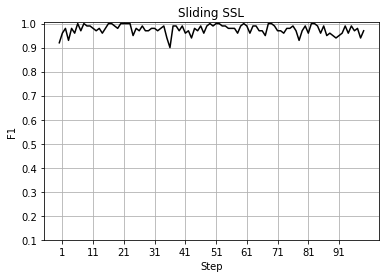




METHOD: Incremental lp as classifier
Execution time:  113.074837866
Average MCC:  0.9049491542770016
Average error: 5.083600000000004
Average macro-F1: 0.9521693605309879
Average micro-F1: 0.9527
Average Accuracy:  94.9164
Standard Deviation:  3.2984655584074245
Variance:  10.879875040000003


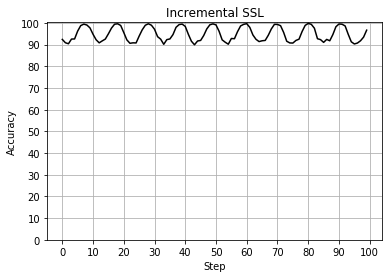

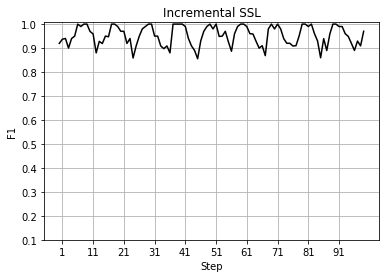

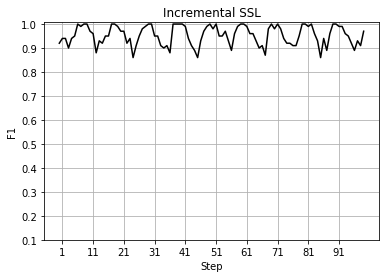




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  30.747347982999997
Average MCC:  0.961411711804002
Average error: 2.4111000000000047
Average macro-F1: 0.9801923857167616
Average micro-F1: 0.9803999999999999
Average Accuracy:  97.5889
Standard Deviation:  1.205687268739286
Variance:  1.4536817899999994


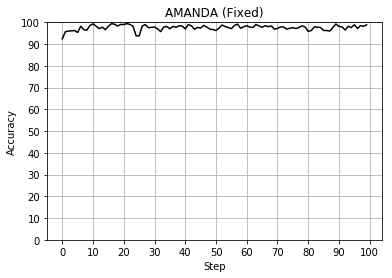

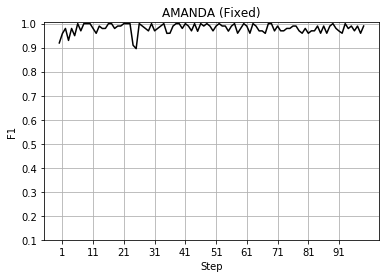

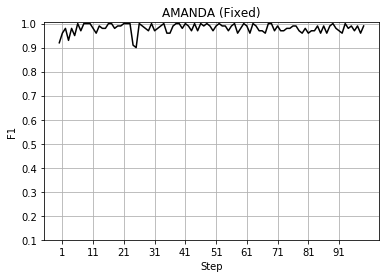




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.30 | Std keeping percentage=0.20
Execution time:  29.951925449000015
Average MCC:  0.9290462194430203
Average error: 3.6888999999999896
Average macro-F1: 0.9637016262866898
Average micro-F1: 0.9641
Average Accuracy:  96.31110000000001
Standard Deviation:  1.1716141813754217
Variance:  1.3726797899999996


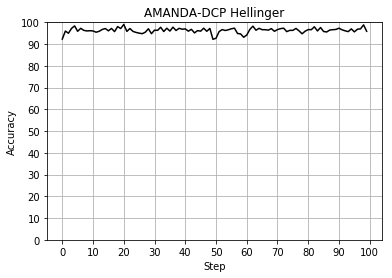

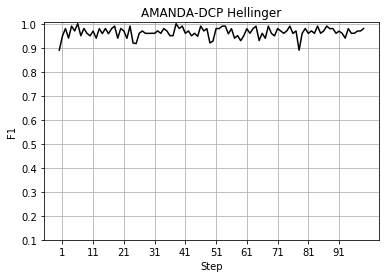

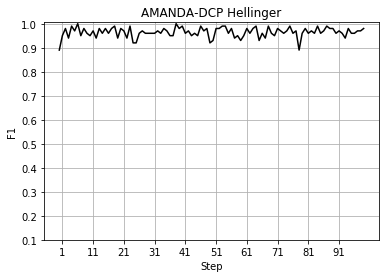




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.20 | Std keeping percentage=0.02
Execution time:  28.656062883000004
Average MCC:  0.944222811480568
Average error: 3.4538000000000295
Average macro-F1: 0.9715737891194138
Average micro-F1: 0.9719
Average Accuracy:  96.54619999999997
Standard Deviation:  1.3322085272208708
Variance:  1.7747795600000016


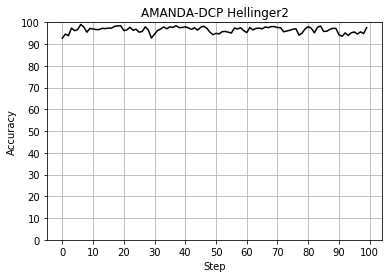

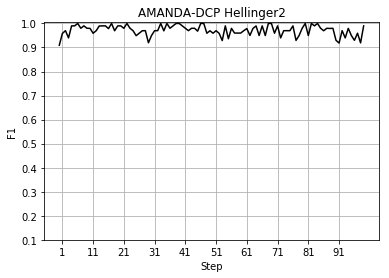

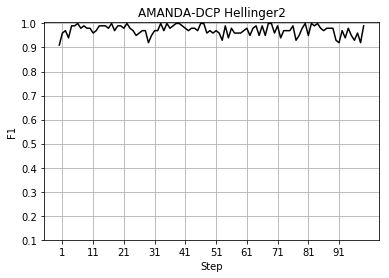




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.26 | Std keeping percentage=0.16
Execution time:  31.772051990000023
Average MCC:  0.931770489398615
Average error: 3.68810000000002
Average macro-F1: 0.9651118668818467
Average micro-F1: 0.9655000000000001
Average Accuracy:  96.31189999999998
Standard Deviation:  1.2381935995634923
Variance:  1.5331233899999979


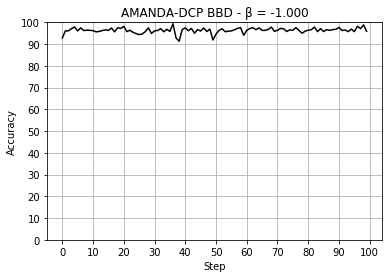

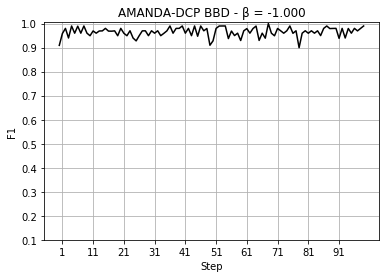

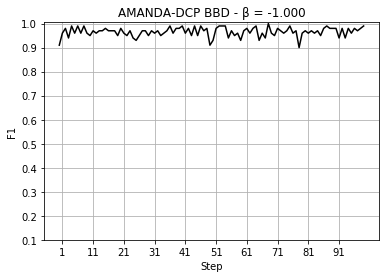




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.18 | Std keeping percentage=0.05
Execution time:  31.346203076999984
Average MCC:  0.940714844064387
Average error: 3.3604999999999734
Average macro-F1: 0.9697485020424523
Average micro-F1: 0.9701000000000001
Average Accuracy:  96.63950000000003
Standard Deviation:  1.0905891756293935
Variance:  1.18938475


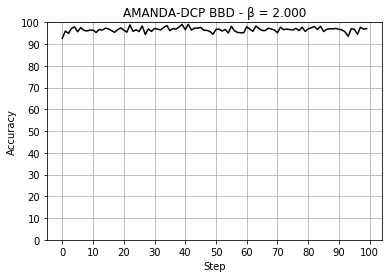

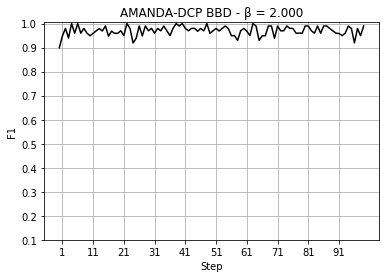

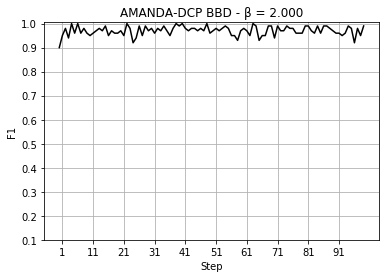




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.19 | Std keeping percentage=0.08
Execution time:  31.658391558999995
Average MCC:  0.9351206957641068
Average error: 3.4487000000000023
Average macro-F1: 0.9669148278221084
Average micro-F1: 0.9673
Average Accuracy:  96.5513
Standard Deviation:  1.1134654507437585
Variance:  1.2398053100000013


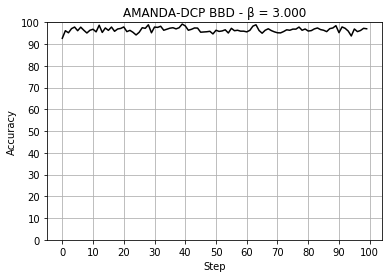

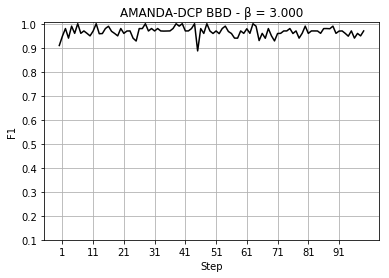

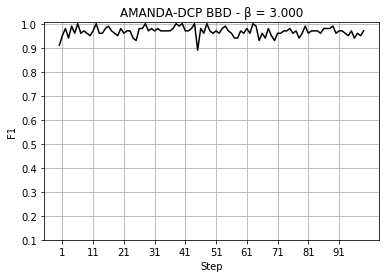




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.21 | Std keeping percentage=0.10
Execution time:  31.44411641900001
Average MCC:  0.9362858989860798
Average error: 3.514700000000005
Average macro-F1: 0.9674307794175193
Average micro-F1: 0.9678000000000001
Average Accuracy:  96.4853
Standard Deviation:  1.1261931051111966
Variance:  1.2683109099999987


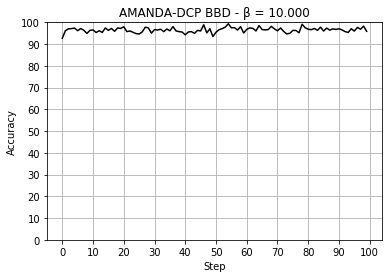

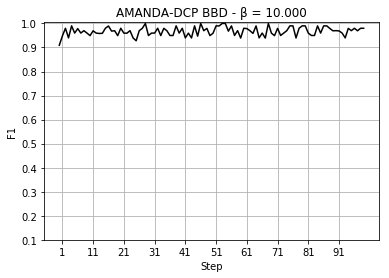

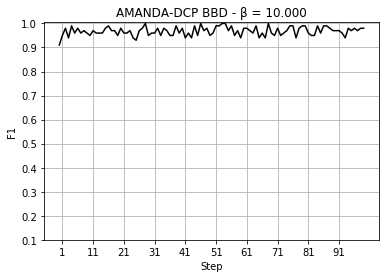

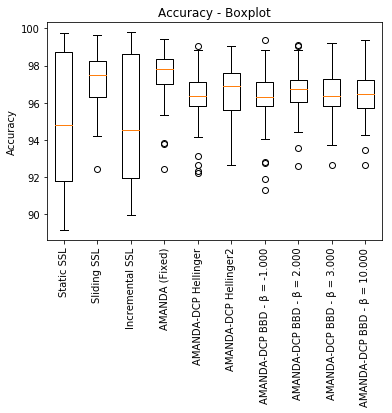

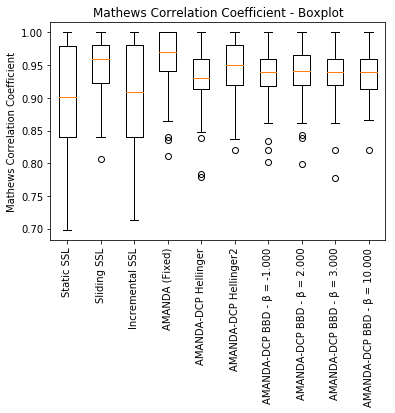

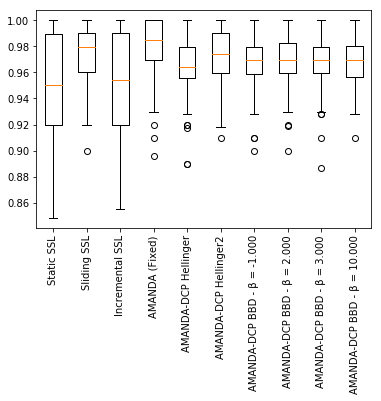

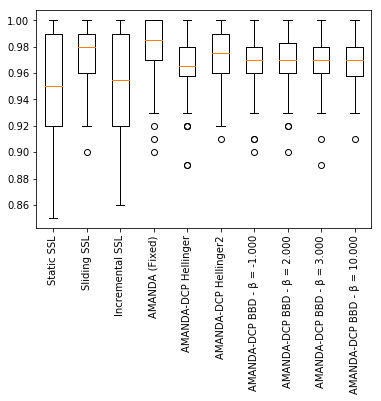

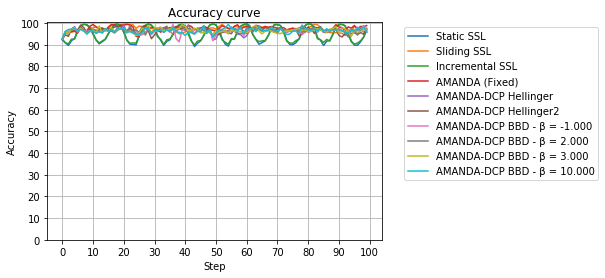

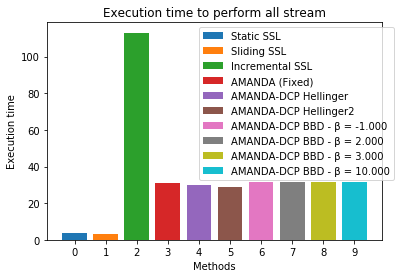

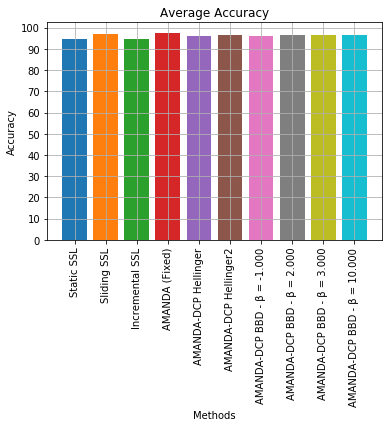

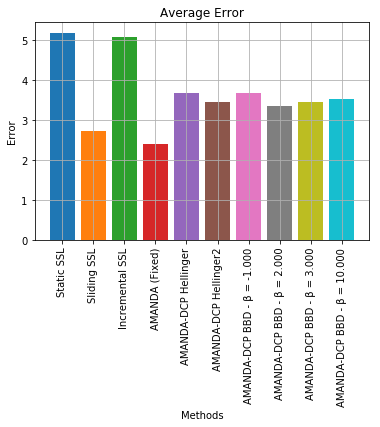

Pos 2 - Error reduction (Sliding SSL):2.5847358418531927
Pos 9 - Error reduction (Incremental SSL):0.10356661484822519
Pos 1 - Error reduction (AMANDA (Fixed)):2.92211832749411
Pos 8 - Error reduction (AMANDA-DCP Hellinger):1.5744867546526244
Pos 5 - Error reduction (AMANDA-DCP Hellinger2):1.8224349333777639
Pos 7 - Error reduction (AMANDA-DCP BBD - β = -1.000):1.5753304745291563
Pos 3 - Error reduction (AMANDA-DCP BBD - β = 2.000):1.920833763982074
Pos 4 - Error reduction (AMANDA-DCP BBD - β = 3.000):1.8278136475908864
Pos 6 - Error reduction (AMANDA-DCP BBD - β = 10.000):1.758206757774372


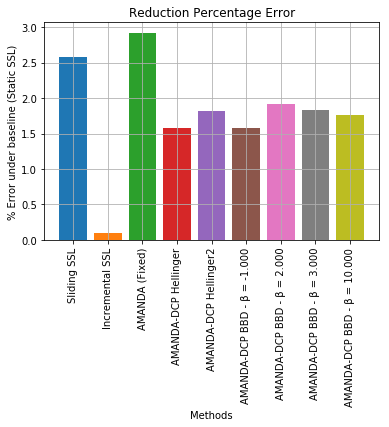

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadGEARS_2C_2D(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.7, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 8, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [6, 7, 5, 5]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 8, None, "kde", sslClassifier, 'HDDDM')
    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 12)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'GEARS_2C_2D', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()